## Visualize platemap design

Each platemap is setup differently to measure different NF1 genotypes, and the cell count is different per well.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))

In [2]:
# Set output files
output_dir <- "platemap_figures"

input_platemap_dir <- file.path("..", "3_extracting_features", "metadata")

platemap_file <- file.path(input_platemap_dir, "NF1_annotations.csv")

In [5]:
platemap_df <- readr::read_csv(
    platemap_file,
    col_types = readr::cols(
        .default = "c"
    )
)

print(dim(platemap_df))
head(platemap_df, 3)

[1] 8 6


Plate,Well,Gene Identifier,Gene Symbol,Genotype,Channels
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,C6,ENSG00000196712,NF1,WT,DAPI (nuclei); GFP (endoplasmic reticulum); RFP (actin/cytoplasm)
1,C7,ENSG00000196712,NF1,Null,DAPI (nuclei); GFP (endoplasmic reticulum); RFP (actin/cytoplasm)
1,D6,ENSG00000196712,NF1,WT,DAPI (nuclei); GFP (endoplasmic reticulum); RFP (actin/cytoplasm)


Warning message:
“Warning: Your well label count ( 8 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


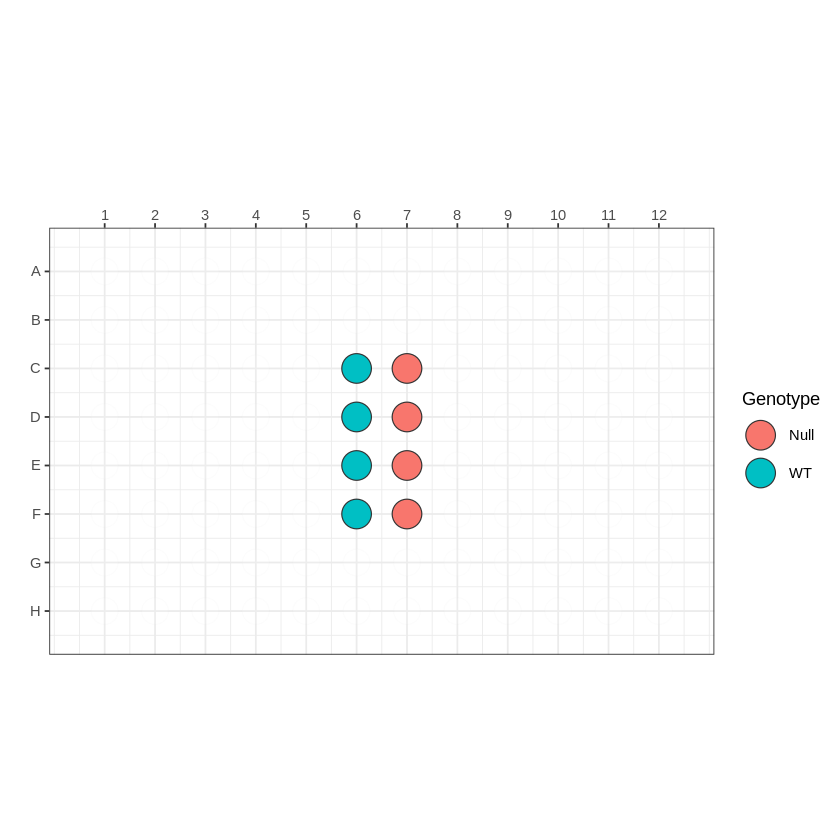

In [9]:
plate_replicate_gg <- (
    platetools::raw_map(
        data = platemap_df$Genotype,
        well = platemap_df$Well,
        plate = 96,
        size = 8
    )
    + scale_fill_discrete(name="Genotype")
)

output_fig_genotype <- file.path(output_dir, "genotype_platemap.png")

ggsave(
    output_fig_genotype,
    plate_replicate_gg,
    dpi = 500,
    height = 3.5,
    width = 6
)

plate_replicate_gg